### Analysis of the Tagging (in-)efficiency of SingleSite (SS) & MultiSite (MS) topologies with DBSCAN 

In [128]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Ellipse
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm
from collections import Counter
import ROOT
import root_numpy
import math
import scipy.integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [129]:
def get_proc(filename):
    f = ROOT.TFile(filename)
    tree = f.Get('events')
    out=root_numpy.tree2array(tree)
    x=np.array([out['Xp'][i] for i in range(len(out['Xp']))])
    y=np.array([out['Yp'][i] for i in range(len(out['Yp']))])
    z=np.array([out['Zp'][i] for i in range(len(out['Zp']))])
    ed=np.array([out['Etot'][i] for i in range(len(out['Etot']))])
    x_rms=np.array([out['Xp_RMS'][i] for i in range(len(out['Xp_RMS']))])
    y_rms=np.array([out['Yp_RMS'][i] for i in range(len(out['Yp_RMS']))])
    z_rms=np.array([out['Zp_RMS'][i] for i in range(len(out['Zp_RMS']))])
    x_pri=([out['xpri']])
    y_pri=([out['ypri']])
    z_pri=([out['zpri']])
    n_scat=([out['nScat']])
    return x, y, z, ed, x_rms, y_rms, z_rms, x_pri, y_pri, z_pri, n_scat


In [137]:
Particle_List = ['electron_2458keV', 'gamma_2458keV', '0vbb_2x1229keV']
SeparationThreshold_List = ['0-5','1', '2', '3', '4', '5', '6', '8', '10', '12', '15', '18', '20', '25', '30']


In [138]:
cd /userdata/fkuger/0vbb_data/0vbb_Topology

/userdata/fkuger/0vbb_data/0vbb_Topology


In [141]:
SS_fraction = np.zeros((len(Particle_List)+1, len(SeparationThreshold_List)))

for i in range(0,len(SeparationThreshold_List)):
    threshold = SeparationThreshold_List[i]
    if (SeparationThreshold_List[i] == '0-5'):
        SS_fraction[0,i] = 0.5
    else: SS_fraction[0,i] = np.float(SeparationThreshold_List[i])
    
    for j in range(0, len(Particle_List)):
        particle = Particle_List[j]
        
        filename = 'Topology_' + particle +'_10e5_Proc_' + threshold  + 'mm.root'
        print(filename)
        x, y, z, ed, x_rms, y_rms, z_rms, x_pri, y_pri, z_pri, n_scat = get_proc(filename)
        SS_fraction[j+1,i] = ((0 < np.array(n_scat)) & (np.array(n_scat) < 2)).sum() / 100000

print(SS_fraction)

Topology_electron_2458keV_10e5_Proc_0-5mm.root
Topology_gamma_2458keV_10e5_Proc_0-5mm.root
Topology_0vbb_2x1229keV_10e5_Proc_0-5mm.root
Topology_electron_2458keV_10e5_Proc_1mm.root
Topology_gamma_2458keV_10e5_Proc_1mm.root
Topology_0vbb_2x1229keV_10e5_Proc_1mm.root
Topology_electron_2458keV_10e5_Proc_2mm.root
Topology_gamma_2458keV_10e5_Proc_2mm.root
Topology_0vbb_2x1229keV_10e5_Proc_2mm.root
Topology_electron_2458keV_10e5_Proc_3mm.root
Topology_gamma_2458keV_10e5_Proc_3mm.root
Topology_0vbb_2x1229keV_10e5_Proc_3mm.root
Topology_electron_2458keV_10e5_Proc_4mm.root
Topology_gamma_2458keV_10e5_Proc_4mm.root
Topology_0vbb_2x1229keV_10e5_Proc_4mm.root
Topology_electron_2458keV_10e5_Proc_5mm.root
Topology_gamma_2458keV_10e5_Proc_5mm.root
Topology_0vbb_2x1229keV_10e5_Proc_5mm.root
Topology_electron_2458keV_10e5_Proc_6mm.root
Topology_gamma_2458keV_10e5_Proc_6mm.root
Topology_0vbb_2x1229keV_10e5_Proc_6mm.root
Topology_electron_2458keV_10e5_Proc_8mm.root
Topology_gamma_2458keV_10e5_Proc_8mm.ro

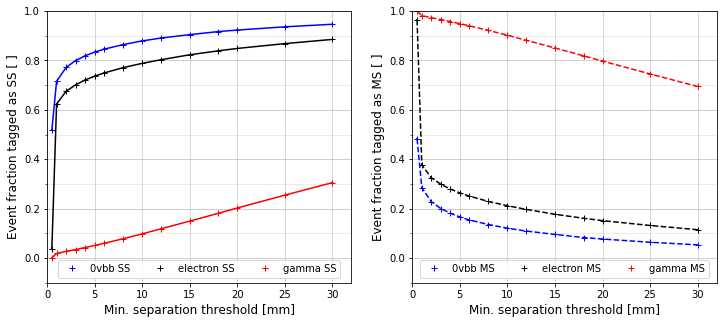

In [142]:
fig, ax = plt.subplots(figsize = (12,5), nrows=1, ncols=2)

ax[0].plot(SS_fraction[0, :], SS_fraction[3, :], '+', color='blue', label = '0vbb SS')
ax[0].errorbar(SS_fraction[0, :], SS_fraction[3, :], color='blue', xerr= 0, yerr=np.sqrt(SS_fraction[3, :]*1e5)/1e5)
ax[1].plot(SS_fraction[0, :], 1-SS_fraction[3, :], '+', color='blue', label = '0vbb MS')
ax[1].errorbar(SS_fraction[0, :], 1-SS_fraction[3, :], linestyle = '--', color='blue', xerr= 0, yerr=np.sqrt((1-SS_fraction[3, :])*1e5)/1e5)

ax[0].plot(SS_fraction[0, :], SS_fraction[1, :], '+', color='black', label = 'electron SS')
ax[0].errorbar(SS_fraction[0, :], SS_fraction[1, :], color='black', xerr= 0, yerr=np.sqrt((SS_fraction[1, :])*1e5)/1e5)
ax[1].plot(SS_fraction[0, :], 1-SS_fraction[1, :], '+', color='black', label = 'electron MS')
ax[1].errorbar(SS_fraction[0, :], 1-SS_fraction[1, :], linestyle = '--', color='black', xerr= 0, yerr=np.sqrt((1-SS_fraction[1, :])*1e5)/1e5)

ax[0].plot(SS_fraction[0, :], SS_fraction[2, :], '+', color='red', label = 'gamma SS')
ax[0].errorbar(SS_fraction[0, :], SS_fraction[2, :],  color='red', xerr= 0, yerr=np.sqrt((SS_fraction[2, :])*1e5)/1e5)
ax[1].plot(SS_fraction[0, :], 1-SS_fraction[2, :], '+', color='red', label = 'gamma MS')
ax[1].errorbar(SS_fraction[0, :], 1-SS_fraction[2, :],  linestyle = '--', color='red', xerr= 0, yerr=np.sqrt((1-SS_fraction[2, :])*1e5)/1e5)

ax[0].set_ylim([-0.1,1])
ax[0].set_xlim([0,32])
ax[0].set_xlabel('Min. separation threshold [mm]', fontsize=12)
ax[0].set_ylabel('Event fraction tagged as SS [ ]', fontsize=12)
ax[0].legend(loc=8, ncol=3)
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[0].grid(b=None, which='major', axis='both', alpha = 0.6)
ax[0].grid(b=None, which='minor', axis='both', alpha = 0.3)

ax[1].set_ylim([-0.1,1])
ax[1].set_xlim([0,32])
ax[1].set_xlabel('Min. separation threshold [mm]', fontsize=12)
ax[1].set_ylabel('Event fraction tagged as MS [ ]', fontsize=12)
ax[1].legend(loc=8, ncol=3)
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[1].grid(b=None, which='major', axis='both', alpha = 0.6)
ax[1].grid(b=None, which='minor', axis='both', alpha = 0.3)


plt.show()

